[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/MikeS96/cv_dl/blob/main/week4/S4L1_Conv.ipynb)

## Relevant imports

In [1]:
import numpy as np
import tensorflow as tf
import tensorflow.keras.layers as LK
import tensorflow.keras.models as MK

In [2]:
# Loading dataset
mnist = tf.keras.datasets.mnist

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [4]:
print('Imagenes de entrenamiento size {}, Size etiquetas: {}'.format(x_train.shape, y_train.shape))
print('Imagenes de prueba size {}, Size etiquetas: {}'.format(x_test.shape, y_test.shape))

Imagenes de entrenamiento size (60000, 28, 28), Size etiquetas: (60000,)
Imagenes de prueba size (10000, 28, 28), Size etiquetas: (10000,)


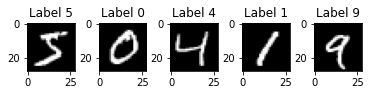

In [5]:
from matplotlib import pyplot as plt

for i in range(5):
  plt.subplot(1, 5, i + 1)
  plt.imshow(x_train[i], cmap = 'gray')
  plt.gca().set_title('Label ' + str(y_train[i]))

plt.subplots_adjust(hspace=0.0, wspace = 0.5)
plt.show()

In [6]:
x_train = x_train.reshape((x_train.shape[0],28,28,1))
x_test = x_test.reshape((x_test.shape[0],28,28,1))
print('Imagenes de entrenamiento size {}, Size etiquetas: {}'.format(x_train.shape, y_train.shape))
print('Imagenes de prueba size {}, Size etiquetas: {}'.format(x_test.shape, y_test.shape))

Imagenes de entrenamiento size (60000, 28, 28, 1), Size etiquetas: (60000,)
Imagenes de prueba size (10000, 28, 28, 1), Size etiquetas: (10000,)


In [7]:
# Normlizando los datos -> Sjould be done using mean and stdv
# (x - x.mean()) / x.std() 
# Mean = 0.1307 Stdv = 0.3081
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train, x_test = (x_train - x_train.min()) / (x_train.max() - x_train.min()), (x_test - x_test.min()) / (x_test.max() - x_test.min())

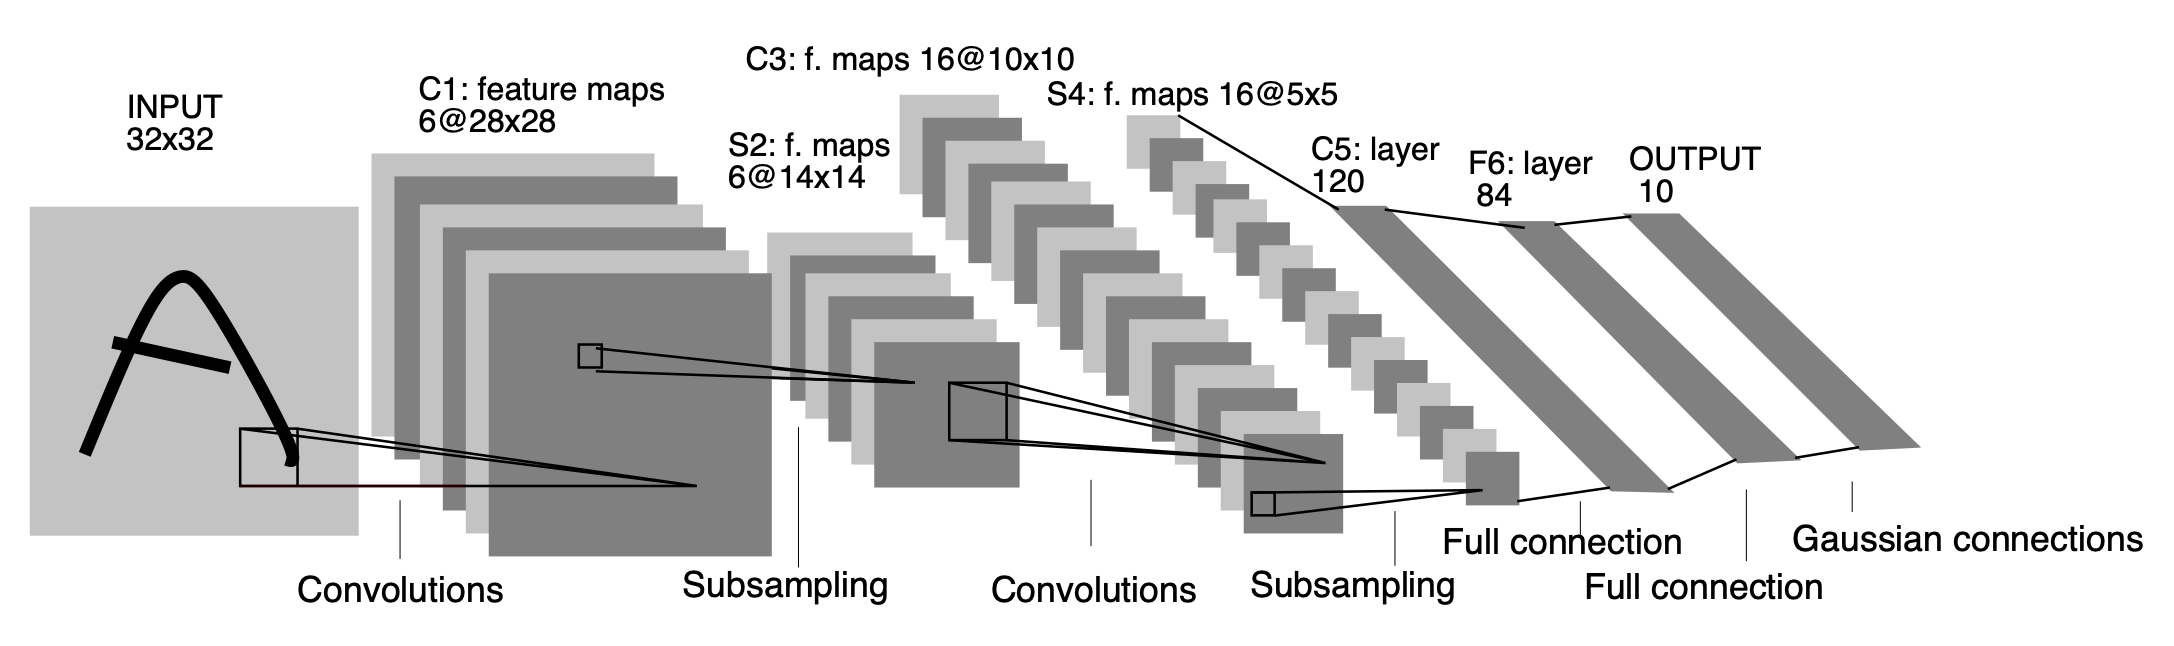

In [11]:
tf.keras.backend.clear_session

<function tensorflow.python.keras.backend.clear_session>

In [12]:
# Creating the model
inputs = LK.Input(shape = (28, 28, 1))
conv1 = LK.Conv2D(6, (5, 5), padding = 'same', activation = 'relu')(inputs)
pool1 = LK.MaxPool2D((2, 2), (2, 2))(conv1)
conv2 = LK.Conv2D(16, (5, 5), padding = 'valid', activation = 'relu')(pool1)
pool2 = LK.MaxPool2D((2, 2), (2, 2))(conv2)
flat = LK.Flatten()(pool2)
FC1 = LK.Dense(120, activation = 'relu')(flat)
FC2 = LK.Dense(84, activation = 'relu')(FC1)
outputs = LK.Dense(10, activation = 'softmax')(FC2)

modelo = MK.Model(inputs, outputs)
modelo.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 6)         156       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 120)               4812

In [13]:
optimo = 'adam'
modelo.compile(optimizer = optimo, loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [14]:
history = modelo.fit(x_train, y_train, epochs = 10, batch_size = 128, validation_data = (x_test, y_test), verbose = 1)
loss, acc = modelo.evaluate(x_test, y_test, verbose = 1)
print('Loss: {0} - Accuracy: {1}'.format(loss, acc))

Epoch 1/10
469/469 [==============================] - 2s 4ms/step - loss: 0.6690 - accuracy: 0.8003 - val_loss: 0.0820 - val_accuracy: 0.9744
Epoch 2/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0804 - accuracy: 0.9753 - val_loss: 0.0553 - val_accuracy: 0.9821
Epoch 3/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0560 - accuracy: 0.9830 - val_loss: 0.0392 - val_accuracy: 0.9865
Epoch 4/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0394 - accuracy: 0.9879 - val_loss: 0.0422 - val_accuracy: 0.9860
Epoch 5/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0355 - accuracy: 0.9891 - val_loss: 0.0338 - val_accuracy: 0.9877
Epoch 6/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0266 - accuracy: 0.9918 - val_loss: 0.0311 - val_accuracy: 0.9900
Epoch 7/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0230 - accuracy: 0.9923 - val_loss: 0.0425 - val_accuracy: 0.9857
Epoch 

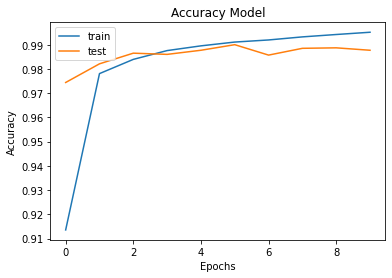

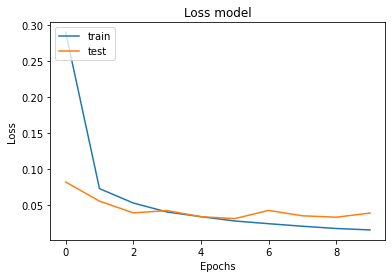

In [17]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy Model')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss model')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()